# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,824,106,55,96,196,60,12,221,30,25,173,225,717,214,72,9,13,186,196
1,768,91,46,101,199,65,9,196,34,23,146,219,574,199,73,5,8,186,194
2,181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
3,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
4,299,98,40,77,171,61,6,172,37,21,139,197,457,141,72,4,17,199,201
5,77,86,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
6,652,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211
7,776,96,45,101,201,66,9,192,34,22,143,218,552,195,73,3,19,189,197
8,191,87,40,81,162,68,10,146,46,19,139,167,317,157,70,0,13,189,199
9,344,99,55,101,219,68,10,224,30,25,178,228,737,213,74,11,20,187,196


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.987250,93.927140,44.947177,82.668488,170.253188,61.843352,8.586521,170.036430,40.675774,20.690346,148.045537,189.723133,446.413479,174.95082,72.342441,6.346084,12.661202,188.925319,195.726776
std,240.752845,8.550098,6.278434,15.804674,33.232860,7.580773,4.519451,33.859555,7.864070,2.641388,14.841244,31.740103,180.400109,32.88577,7.274546,4.879243,9.047622,6.056597,7.361745
min,2.000000,77.000000,33.000000,40.000000,110.000000,47.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,114.00000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,228.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.00000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,439.000000,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,180.000000,367.000000,173.00000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,645.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,601.000000,199.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
class_name = np.unique(y_train)
count_of_class = dict()
for curr_class in y_train:
    count_of_class[curr_class] = 1 + count_of_class.get(curr_class, 0)
count_of_class

{'opel': 152, 'saab': 141, 'bus': 133, 'van': 123}

You can see that the classes are almost balanced, so I will not balance them) But it is also clear that the values can differ greatly from each other, so I will normalize

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from scikitplot.metrics import plot_roc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [9]:
parametrs__model_grid = {'penalty': ['l1', 'l2'],
                         'C': np.linspace(-5, 5, 20)}

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
cv_logistic_regression_model = GridSearchCV(estimator=logistic_regression_model, param_grid=parametrs__model_grid, cv=5)
cv_logistic_regression_model.fit(X_train, y_train)
cv_logistic_regression_model = cv_logistic_regression_model.best_estimator_
y_predict = cv_logistic_regression_model.predict(X_test)
print(f'accuracy_score = {np.round(accuracy_score(y_test, y_predict), 3)}')
print(f'      f1_score = {np.round(f1_score(y_test, y_predict, average="macro"), 3)}')
best_param_reg = cv_logistic_regression_model.get_params()

accuracy_score = 0.801
      f1_score = 0.788


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

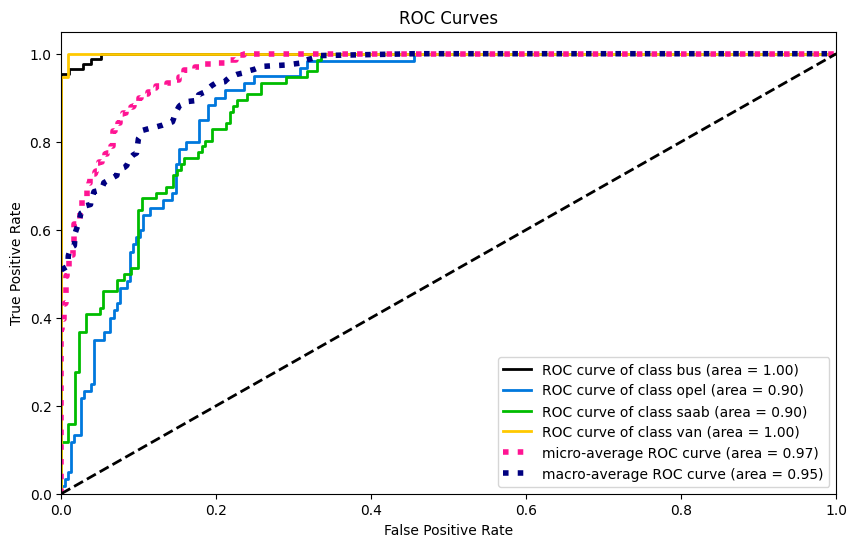

In [10]:
y_proba = cv_logistic_regression_model.predict_proba(X_test)

plot_roc(y_test, y_proba, figsize=(10, 6))

In [11]:
X_test.shape

(297, 19)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
pca = PCA()
pca_model = pca.fit_transform(X_train)
exp_var_ratio = pca.explained_variance_ratio_

In [13]:
np.cumsum(exp_var_ratio[:8])[-1]

0.9645539778489051

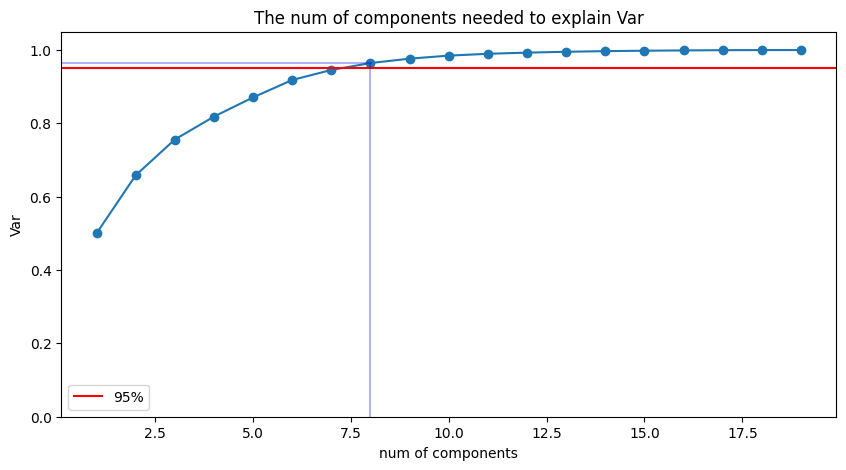

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(1, exp_var_ratio.shape[0] + 1), np.cumsum(exp_var_ratio))
plt.plot(np.arange(1, exp_var_ratio.shape[0] + 1), np.cumsum(exp_var_ratio))
plt.axhline(y=0.95, color='red', label='95%')
plt.title('The num of components needed to explain Var')
plt.xlabel('num of components')
plt.ylabel('Var')
plt.vlines(x=8, ymax=np.cumsum(exp_var_ratio[:8])[-1], ymin=0, color='blue', alpha=0.3)
plt.axhline(y=np.cumsum(exp_var_ratio[:8])[-1], xmax=0.4, color='blue', alpha=0.3)
plt.ylim(ymin=0)
plt.legend()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I think to get 95% of variance explained we need 8 components. And of course we need to normalize the data, because PCA very sensitive to the scale of the variables and without normalization, we cannot guarantee that the importance of features will not be subject to different scales for different features. Fortunately for us, I already did it at the very beginning))

In [15]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [16]:
X_train.shape

(549, 8)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [17]:
parametrs__model_grid = {'penalty': ['l1', 'l2'],
                         'C': np.linspace(-5, 5, 20)}

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
cv_logistic_regression_model = GridSearchCV(estimator=logistic_regression_model, param_grid=parametrs__model_grid, cv=5)
cv_logistic_regression_model.fit(X_train, y_train)
y_predict = cv_logistic_regression_model.predict(X_test)
print(f'accuracy_score = {np.round(accuracy_score(y_test, y_predict), 3)}')
print(f'      f1_score = {np.round(f1_score(y_test, y_predict, average="macro"), 3)}')

accuracy_score = 0.63
      f1_score = 0.605


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

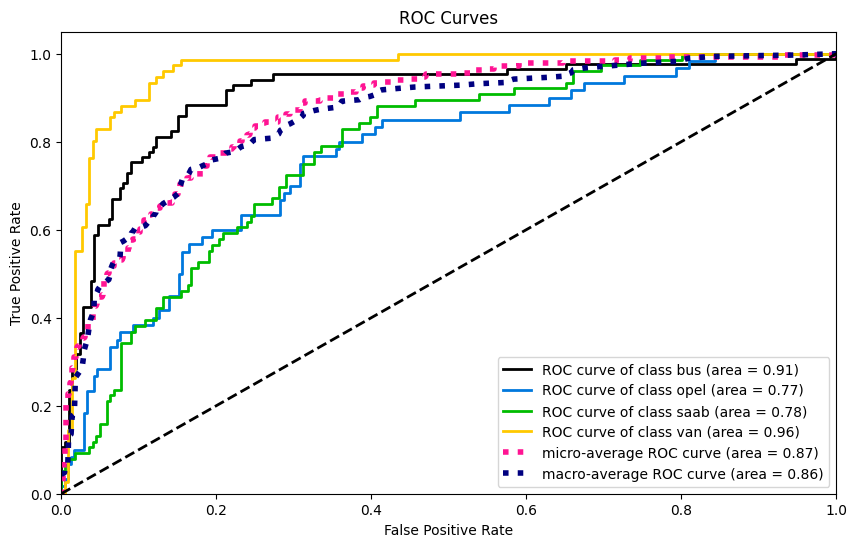

In [18]:
y_proba = cv_logistic_regression_model.predict_proba(X_test)

plot_roc(y_test, y_proba, figsize=(10, 6))

Here we see that the quality has dropped significantly. Here we pay the quality of prediction for the reduction of features, i.e., memory reduction.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(846, 19) (846,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model_cv = GridSearchCV(estimator=decision_tree_model, cv=5, param_grid={'max_depth': np.arange(1, 30, 1)})
decision_tree_model_cv.fit(X_train, y_train)
decision_tree_model_cv = decision_tree_model_cv.best_estimator_
print(decision_tree_model_cv)
best_param_tree = {'max_depth': decision_tree_model_cv.max_depth}

DecisionTreeClassifier(max_depth=24)


In [21]:
y_predict = decision_tree_model_cv.predict(X_test)
print(f'best_max_depth = {decision_tree_model_cv.max_depth}')
print(f'accuracy_score = {np.round(accuracy_score(y_test, y_predict), 3)}')
print(f'      f1_score = {np.round(f1_score(y_test, y_predict, average="macro"), 3)}')

best_max_depth = 24
accuracy_score = 0.694
      f1_score = 0.687


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

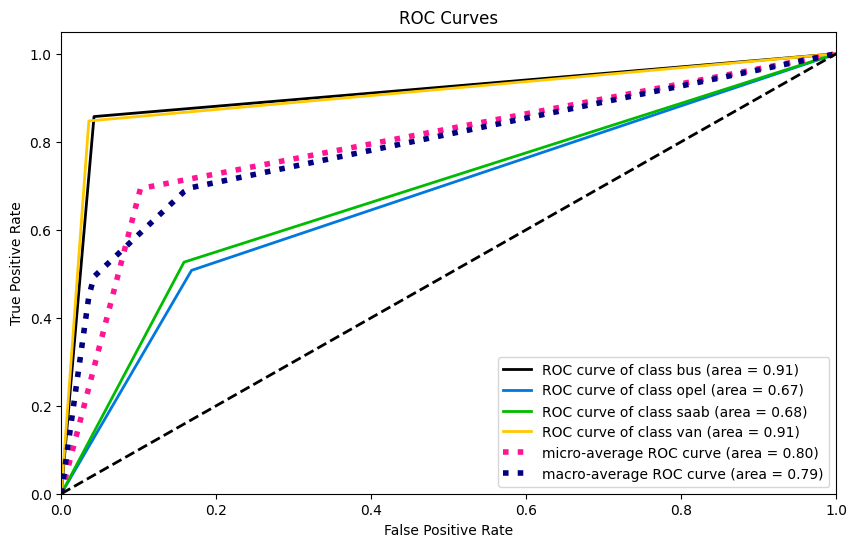

In [22]:
y_proba = decision_tree_model_cv.predict_proba(X_test)

plot_roc(y_test, y_proba, figsize=(10, 6))

In the decisive tree, we have worse quality than in the PCA case.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
accuracy_log_regressions, accuracy_decision_trees = [], []
f1_log_regressions, f1_decision_trees = [], []
grid = np.arange(2, 100, 5)

In [25]:
for N in grid:
    # LogisticRegression
    bag_log_regressions = BaggingClassifier(
        estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500),
        n_estimators=N)
    bag_log_regressions.fit(X_train, y_train)
    y_pred_curr = bag_log_regressions.predict(X_test)
    accuracy_log_regressions.append(accuracy_score(y_test, y_pred_curr))
    f1_log_regressions.append(f1_score(y_test, y_pred_curr, average="macro"))

    #DecisionTree
    bag_decision_trees = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=N
    )
    bag_decision_trees.fit(X_train, y_train)
    y_pred_curr = bag_decision_trees.predict(X_test)
    accuracy_decision_trees.append(accuracy_score(y_test, y_pred_curr))
    f1_decision_trees.append(f1_score(y_test, y_pred_curr, average="macro"))

In [26]:
max_ylim = max(accuracy_log_regressions + f1_log_regressions + accuracy_decision_trees + f1_decision_trees) + 0.005

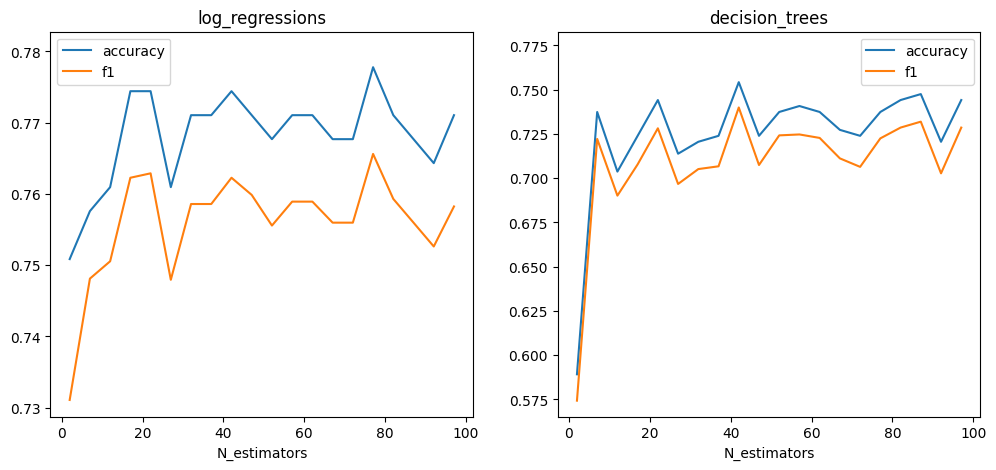

In [27]:
fig = plt.figure(figsize=(12, 5))
rows = 1
column = 2
grid = np.arange(2, 100, 5)

fig.add_subplot(rows, column, 1)
plt.title('log_regressions')
plt.plot(grid, accuracy_log_regressions, label='accuracy')
plt.plot(grid, f1_log_regressions, label='f1')
plt.legend()
plt.xlabel('N_estimators')
plt.ylim(ymax=max_ylim)

fig.add_subplot(rows, column, 2)
plt.plot(grid, accuracy_decision_trees, label='accuracy')
plt.plot(grid, f1_decision_trees, label='f1')
plt.title('decision_trees')
plt.legend()
plt.xlabel('N_estimators')
plt.ylim(ymax=max_ylim)

plt.subplots_adjust()

For ensembles of logistic regression optimal number of algorithms is about 12-15. The error in this case behaves very unstable when compared with an ensemble of decision trees. In case decisition trees, we can see that after N=35-40 error has stopped increasing.

I don't think moving max_depth from task 2.5 would be a good idea. Since the essence of bagging, especially on small samples, is that the basic algorithms can be very different, which helps in our case (we have a small sample). And if we transfer this hyperparameter, then our base trees in the ensemble will be very similar, and then the meaning of using the ensemble disappears.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [28]:
from sklearn.ensemble import RandomForestClassifier

f1_random_forest, accuracy_random_forest = [], []
grid_num_of_forest = np.arange(1, 200, 1)

for N in grid_num_of_forest:
    random_forest_model = RandomForestClassifier(n_estimators=N)
    random_forest_model.fit(X_train, y_train)
    y_predict = random_forest_model.predict(X_test)
    accuracy_random_forest.append(accuracy_score(y_test, y_predict))
    f1_random_forest.append(f1_score(y_test, y_predict, average="macro"))
best_param_rf = f1_random_forest.index(max(f1_random_forest))

Text(0, 0.5, 'score')

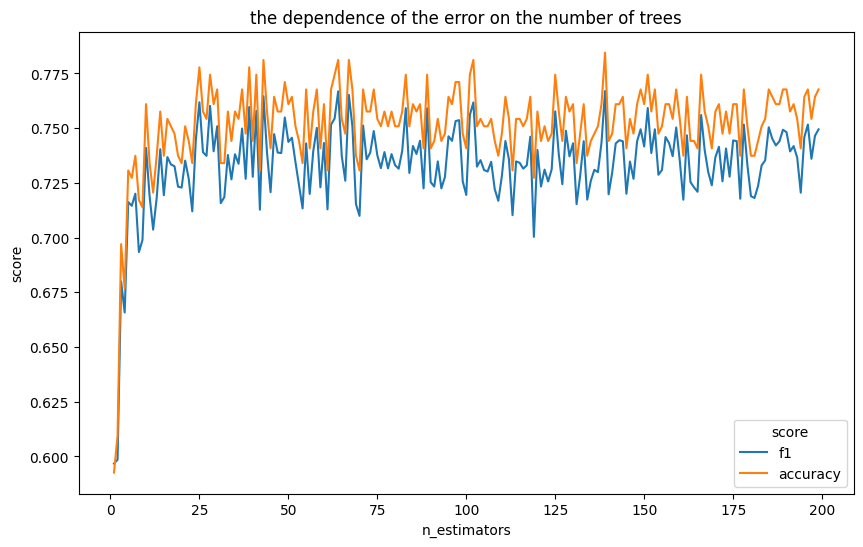

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(grid_num_of_forest, f1_random_forest, label='f1')
plt.plot(grid_num_of_forest, accuracy_random_forest, label='accuracy')
plt.legend(title='score', loc='lower right')
plt.title('the dependence of the error on the number of trees')
plt.xlabel('n_estimators')
plt.ylabel('score')

We can see that the situation is similar to when build a Bagging ensebmles of decision trees. The error stabilizes after n_estimators=35.
Since we have a simple classification task based on fairly good data, we have almost no difference.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [30]:
num_of_parts = 10
X_train_parts, y_train_parts = np.array_split(X_train, num_of_parts), np.array_split(y_train, num_of_parts)

accuracy_error = {'log_reg': [], 'tree': [], 'random_forest': []}
f1_error = {'log_reg': [], 'tree': [], 'random_forest': []}

grid = np.arange(0, 10, 1)

In [31]:
X_train_curr, y_train_curr = X_train_parts[0], y_train_parts[0]
best_models = {
    'log_reg': LogisticRegression(**best_param_reg), 
    'tree': DecisionTreeClassifier(max_depth=best_param_tree['max_depth']),
    'random_forest': RandomForestClassifier(max_depth=best_param_rf)
}

In [32]:
for n in grid:
    if n != 0:
        X_train_curr = np.concatenate((X_train_curr, X_train_parts[n]))
        y_train_curr = np.concatenate((y_train_curr, y_train_parts[n]))

    for model_name, curr_model in best_models.items():
        curr_model.fit(X_train_curr, y_train_curr)
        y_pred_curr = curr_model.predict(X_test)
        accuracy_error[model_name].append(accuracy_score(y_test, y_pred_curr))
        f1_error[model_name].append(f1_score(y_test, y_pred_curr, average="macro"))

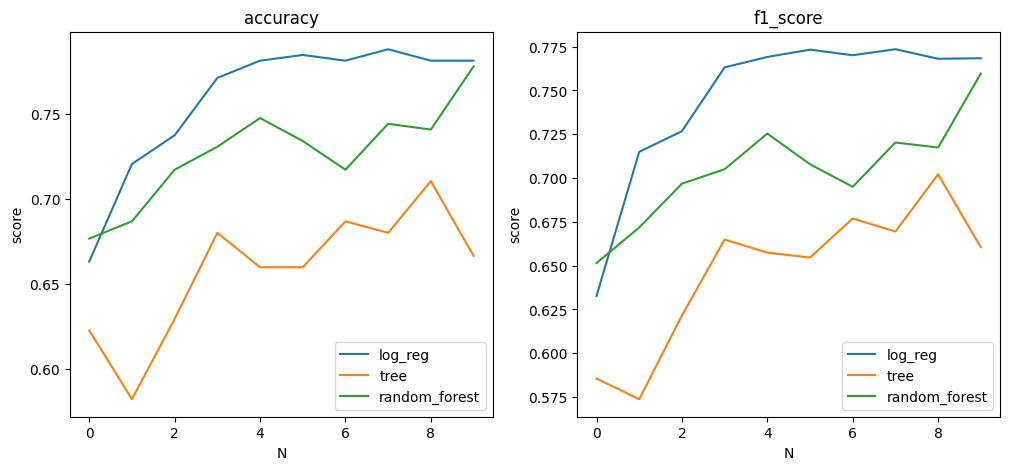

In [33]:
fig = plt.figure(figsize=(12, 5))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.plot(grid, accuracy_error['log_reg'], label='log_reg')
plt.plot(grid, accuracy_error['tree'], label='tree')
plt.plot(grid, accuracy_error['random_forest'], label='random_forest')
plt.title('accuracy')
plt.xlabel('N')
plt.ylabel('score')
plt.legend()

fig.add_subplot(rows, columns, 2)
plt.plot(grid, f1_error['log_reg'], label='log_reg')
plt.plot(grid, f1_error['tree'], label='tree')
plt.plot(grid, f1_error['random_forest'], label='random_forest')
plt.title('f1_score')
plt.xlabel('N')
plt.ylabel('score')
plt.legend()

plt.subplots_adjust()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [34]:
num_to_class_name = dict(zip(np.arange(0, 5, 1), np.unique(y_test)))
name_to_num_class = dict(zip(np.unique(y_test), np.arange(0, 5, 1)))

# class name to number
y_num_train = np.array([name_to_num_class[i] for i in y_train])

# num class to name
y_num_test = np.array([name_to_num_class[i] for i in y_test])

In [35]:
import xgboost as xgb

model = xgb.XGBClassifier()
param_grid_xgb = {'n_estimators': np.arange(10, 500, 10)}
grid_model_cv = GridSearchCV(model, param_grid_xgb, cv=5, n_jobs=-1)
grid_result = grid_model_cv.fit(X_train, y_num_train)
best_model = grid_result.best_estimator_

In [36]:
y_predict_num = best_model.predict(X_test)
y_predict = np.array([num_to_class_name[i] for i in y_predict_num])
print(f'accuracy_score = {np.round(accuracy_score(y_test, y_predict), 3)}')
print(f'      f1_score = {np.round(f1_score(y_test, y_predict, average="macro"), 3)}')
best_n_estimators = best_model.get_params()['n_estimators']
print(f'best_n_estimators = {best_n_estimators}')

accuracy_score = 0.754
      f1_score = 0.74
best_n_estimators = 20


As we can see, score is much better than in the previous tasks. Gradient boosting trees be more accurate than random forests. Because we train them to correct each other’s errors, they’re capable of capturing complex patterns in the data. 